# Omar Godinez Quinones
# Reinforcement learning

In [1]:
import itertools
import matplotlib
import matplotlib.style
import numpy as np

from collections import defaultdict
import plotting
import matplotlib.pyplot as plt
import gym

matplotlib.style.use('ggplot')

In [2]:
def createEpsilonGreedyPolicy(Q, probability, num_actions):
    """
    Creates an epsilon-greedy policy based
    on a given Q-function and epsilon.
       
    Returns a function that takes the state
    as an input and returns the probabilities
    for each action in the form of a numpy array 
    of length of the action space(set of possible actions).
    """
    def policyFunction(state):
        Action_probabilities = np.ones(num_actions,
                dtype = float) * probability / num_actions
                  
        best_action = np.argmax(Q[state])
        Action_probabilities[best_action] += (1.0 - probability)
        #print(Action_probabilities, "\n")
        return Action_probabilities
   
    return policyFunction

In [3]:
def qLearning(Q, env, num_episodes, discount_factor = 1.0,
                            alpha = 0.6, probability = 0.1):
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy"""
       
    # Action value function
    # A nested dictionary that maps
    # state -> (action -> action-value).
   
    # Keeps track of useful statistics
    stats = plotting.EpisodeStats(
        episode_lengths = np.zeros(num_episodes),
        episode_rewards = np.zeros(num_episodes))    
       
    # Create an epsilon greedy policy function
    # appropriately for environment action space
    policy = createEpsilonGreedyPolicy(Q, probability, env.action_space.n)
       
    # For every episode
    for ith_episode in range(num_episodes):
           
        # Reset the environment and pick the first action
        state = env.reset()
           
        for t in itertools.count():
               
            # get probabilities of all actions from current state
            action_probabilities = policy(state)
   
            # choose action according to 
            # the probability distribution
            action = np.random.choice(np.arange(
                      len(action_probabilities)),
                       p = action_probabilities)
   
            # take action and get reward, transit to next state
            next_state, reward, done, _ = env.step(action)
   
            # Update statistics
            stats.episode_rewards[ith_episode] += reward
            stats.episode_lengths[ith_episode] = t
               
            # TD Update
            best_next_action = np.argmax(Q[next_state])    
            td_target = reward + discount_factor * Q[next_state][best_next_action]
            td_delta = td_target - Q[state][action]
            Q[state][action] += alpha * td_delta
   
            # done is True if episode terminated   
            if done:
                break
                   
            state = next_state
       
    return Q, stats

Creation of the enviroments (GYM) to train the agent

In [4]:
env = gym.make("CliffWalking-v0")
Q1, stats = qLearning(defaultdict(lambda: np.zeros(env.action_space.n)), env, 500)

In [5]:
env2 = gym.make("Taxi-v3").env
Q2, stats2 = qLearning(defaultdict(lambda: np.zeros(env2.action_space.n)), env2, 500)

Plotting the learning curve of the agent

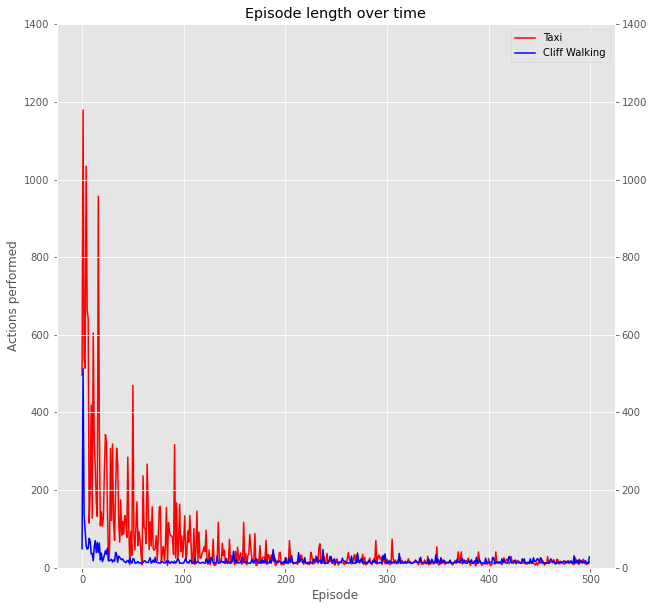

In [6]:
fig, ax1 = plt.subplots(figsize=(10,10))
plot_1 = ax1.plot(stats2[0], label = "Taxi", color = 'red')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Actions performed')
ax2 = ax1.twinx()
plot_2 = ax2.plot(stats[0], label = "Cliff Walking", color = 'blue')
ax1.set_ylim([0, 1400])
ax2.set_ylim([0, 1400])

lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.title("Episode length over time")
plt.legend(lns, labels)
plt.show()

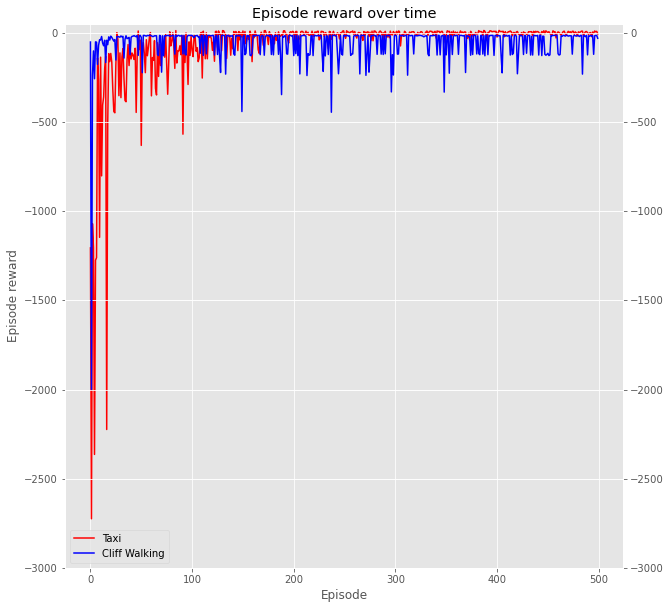

In [7]:
fig, ax1 = plt.subplots(figsize=(10,10))
plot_1 = ax1.plot(stats2[1], label = "Taxi", color = 'red')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Episode reward')
ax2 = ax1.twinx()
plot_2 = ax2.plot(stats[1], label = "Cliff Walking", color = 'blue')
ax1.set_ylim([-3000, 50])
ax2.set_ylim([-3000, 50])

lns = plot_1 + plot_2 
plt.title("Episode reward over time")
plt.legend(lns, labels)
plt.show()

Running the agent in the enviroment again, but now with the learned data from the training

In [8]:
env = gym.make("CliffWalking-v0")
Q1, stats = qLearning(Q1, env, 100, 1.0, 1, 0)
env2 = gym.make("Taxi-v3").env
Q2, stats2 = qLearning(Q2, env2, 100, 1.0, 1, 0)

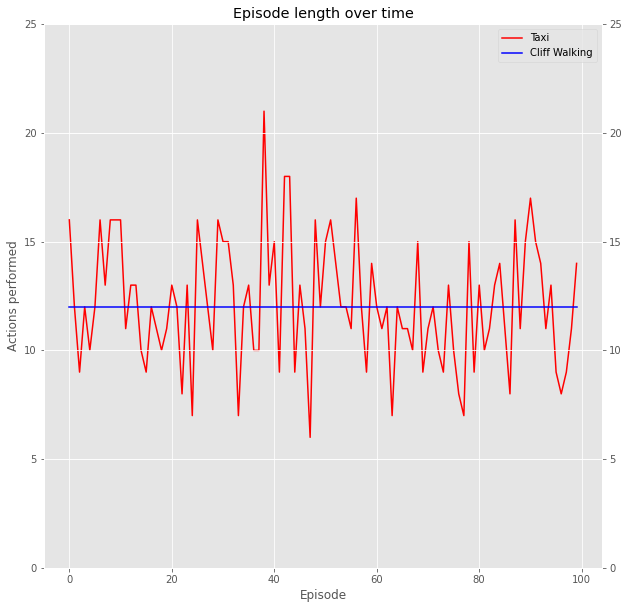

In [9]:
fig, ax1 = plt.subplots(figsize=(10,10))
plot_1 = ax1.plot(stats2[0], label = "Taxi", color = 'red')
ax1.set_xlabel('Episode')
ax1.set_ylabel('Actions performed')
ax2 = ax1.twinx()
plot_2 = ax2.plot(stats[0], label = "Cliff Walking", color = 'blue')
ax1.set_ylim([0, 25])
ax2.set_ylim([0, 25])

lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.title("Episode length over time")
plt.legend(lns, labels)
plt.show()